# Projeto Final -  História das Olimpíadas

**Degree**: Data Science | **Turma**: 815 | **Instituição**: Let's Code | **Módulo**: V - Técnicas de Programação II

Professora: [Gabriela Uhrigshardt](https://github.com/gabrielagu)


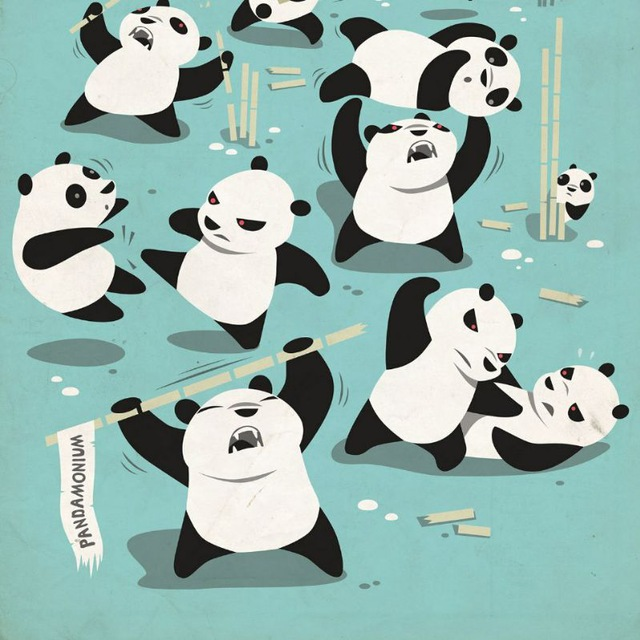

### Grupo Pandamonium 2 - A Missão 


**Colegas participantes do grupo para o projeto**:

* [Daniel Aquino](https://github.com/DanWolks)

* [Jeremias Diefenthaler](https://github.com/JeremiasDief)

* [Ana Gabriela de Castro Almeida](https://github.com/almeidacastrogabriela)

----------------------
------------------------

Este projeto consiste em uma análise de dados históricos dos jogos olímpicos.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

## Metadados:

O arquivo ```athlete_events.csv``` contém 271116 linhas e 15 colunas. Cada linha corresponde a um indivíduo (atleta) que competiu em um evento olímpico individual. Veja a descrição das 15 colunas, a seguir:

- **ID:** Valor único para cada atleta
- **Name:** Nome do atleta
- **Sex:** Gênero do atleta (M para masculino e F para feminino)
- **Age:** Idade do atleta no momento da competição
- **Height:** Altura do atleta, em centímetros
- **Weight:** Peso do atleta, em kg
- **Team:** Nome do time
- **NOC:** National Olympic Committee (código de 3 letras)
- **Games:** Ano e temporada dos jogos
- **Year:** Ano dos jogos
- **Season:** Temporada dos jogos (summer para verão e winter para inverno)
- **City:** Cidade em que ocorreu os jogos
- **Sport:** Esporte praticado pelo atleta
- **Event:** Categoria/modalidade da competição
- **Medal:** Medalha adquirida: Gold (ouro), Silver (prata), Bronze ou NA

In [1]:
# Importando as bibliotecas necessárias

import pandas as pd

import numpy as np

import plotly.express as px

import plotly.graph_objects as go

import plotly.figure_factory as ff

import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./data/athlete_events.csv")

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## O Brasil nas olímpiadas

**1.** Crie um DataFrame contendo apenas informações sobre atletas **brasileiros**. Exiba a quantidade de linhas desse novo DataFrame.

In [5]:
# Número de atletas brasileiros que participaram pelo Comitê Olímpico Brasileiro ("NOC" = "BRA")
df[df["NOC"]=="BRA"].shape

(3848, 15)

In [6]:
# Número de atletas brasileiros verificados pela coluna "Team" = "Brazil"
df[df["Team"]=="Brazil"].shape

(3772, 15)

 - Após utilizar "shape" para verificar o número de atletas, observamos uma divergência ao fazer a contagem pela coluna "Team" = "Brazil" e pela coluna "NOC" = "BRA"

In [7]:
# Verificando os nomes na coluna "Team" que são diferentes de "Brazil"
df[(df["NOC"]=="BRA") & (df["Team"]!="Brazil")]["Team"].value_counts()

Brazil-1        28
Brazil-2        28
Escapade         3
Clementine V     2
Inca             2
Buscape II       2
Andorinha        2
Terrible         2
Bu III           2
Vento Sul        2
Pimm             2
Lbeck            1
Name: Team, dtype: int64

 - Através dessa verificação, podemos observar que a coluna "NOC" é a mais assertiva para selecionarmos todos os atletas brasileiros

In [8]:
# Criando um DataFrame somente com atletas brasileiros e obtendo o número de linhas totais deste novo DataFrame

df_brasil = df[df["NOC"]=="BRA"].copy()
df_brasil.shape

(3848, 15)

In [9]:
# Verificando se há colunas com valores nulos
df_brasil.isnull().sum()

ID           0
Name         0
Sex          0
Age         60
Height     483
Weight     660
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     3373
dtype: int64

In [10]:
# Verificando se o Brasil ganhou alguma medalha nos Jogos de Inverno
df_brasil[df_brasil["Season"]=="Winter"]["Medal"].count()

0

-------------------------------------------------
-------------------------------------------------

**2. Será que existe alguma correlação entre a altura do atleta e seu desempenho, para algum esporte? Faça essa análise separadamente para cada gênero, e conclua.**

Gere um ou mais gráficos de sua escolha, em que seja possível comparar as alturas dos atletas de cada esporte, separando-os por gênero. Se necessário, crie colunas ou DataFrames auxiliares.

**Facilitador:** se quiser, analise apenas os esportes em que se tenha ao menos 5 atletas medalhistas e 5 atletas não medalhistas, para facilitar visualizações e conclusões.

In [11]:
# Verificando os medalhistas por categorias no esporte Judô
# Com isso foi possível analisar que o número de dados é insuficiente
df_brasil[(df_brasil["Sport"]=="Judo") & df_brasil["Medal"].isin(["Gold", "Silver", "Bronze"])]["Event"].value_counts()

Judo Men's Lightweight            4
Judo Men's Half-Heavyweight       4
Judo Men's Half-Middleweight      2
Judo Men's Half-Lightweight       2
Judo Men's Middleweight           2
Judo Women's Half-Heavyweight     2
Judo Men's Heavyweight            2
Judo Women's Lightweight          2
Judo Men's Extra-Lightweight      1
Judo Women's Extra-Lightweight    1
Name: Event, dtype: int64

In [12]:
# Criando uma cópia do DataFrame "df_brasil"
df_analise_2 = df_brasil.copy()

# Eliminando os valores nulos da coluna "Height"
df_analise_2.dropna(subset=["Height"], inplace=True)
df_analise_2.shape

(3365, 15)

In [13]:
# Verificando a quantidade de medalhas conquistadas por esporte pelo gênero MASCULINO
df_analise_2[df_analise_2["Medal"].isin(["Gold", "Silver", "Bronze"]) &
            df_analise_2["Sex"].isin(["M"])]["Sport"].value_counts()

Football            97
Volleyball          72
Sailing             30
Basketball          27
Athletics           25
Swimming            18
Judo                16
Beach Volleyball    12
Equestrianism        9
Boxing               4
Shooting             4
Gymnastics           4
Canoeing             4
Taekwondo            1
Name: Sport, dtype: int64

In [14]:
# Selecionando apenas esportes que tiveram 5 ou mais medalhistas do gênero MASCULINO.
# Para essa análise foram considerados todos os atletas medalhistas, inclusive os que ganharam em esportes coletivos.
df_aux_M = df_analise_2[df_analise_2["Sport"].isin(["Football", "Volleyball", "Basketball", "Sailing", "Athletics",
                                                  "Beach Volleyball", "Judo", "Swimming", "Equestrianism"]) &
                      df_analise_2["Sex"].isin(["M"])]

# Criando uma coluna auxiliar para saber se o atleta ganhou medalha ou não
df_aux_M["Medalhista?"] = np.where(df_aux_M["Medal"].isnull(), "Não", "Sim")


# Traduzindo os valores das colunas
df_aux_M["Sport"] = df_aux_M["Sport"].map({"Football": "Futebol", "Volleyball": "Vôlei", 
                                           "Basketball": "Basquete", "Sailing": "Vela", 
                                           "Athletics": "Atletismo", "Beach Volleyball": "Vôlei de Praia", 
                                           "Judo": "Judô", "Swimming": "Natação", "Equestrianism": "Hipismo"})

# Traduzindo os nomes das medalhas
df_aux_M["Medal"] = df_aux_M["Medal"].map({"Gold": "Ouro", "Silver": "Prata", "Bronze": "Bronze"})

df_aux_M.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medalhista?
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Vôlei,Volleyball Men's Volleyball,NaN,Não
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Vôlei,Volleyball Men's Volleyball,NaN,Não
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Futebol,Football Men's Football,NaN,Não
1651,918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Futebol,Football Men's Football,Prata,Sim
1652,918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Futebol,Football Men's Football,Prata,Sim


 - Agora que já verificamos a altura dos medalhistas brasileiros para o gênero masculino, precisamos verificar se a altura também possui influência ou não para as medalhistas femininas.

In [15]:
# Verificando a quantidade de medalhas ganhas por esporte pelo gênero FEMININO
df_analise_2[df_analise_2["Medal"].isin(["Gold", "Silver", "Bronze"]) &
            df_analise_2["Sex"].isin(["F"])]["Sport"].value_counts()

Volleyball           48
Football             35
Basketball           24
Beach Volleyball     13
Judo                  5
Sailing               4
Boxing                1
Taekwondo             1
Athletics             1
Modern Pentathlon     1
Swimming              1
Name: Sport, dtype: int64

In [16]:
# Selecionando apenas esportes que tiveram 5 ou mais medalhistas do gênero FEMININO.
# Para essa análise foram consideradas todas as atletas medalhistas, inclusive as que ganharam em esportes coletivos.
df_aux_F = df_analise_2[df_analise_2["Sport"].isin(["Football", "Volleyball", "Basketball", "Beach Volleyball", "Judo"]) &
                      df_analise_2["Sex"].isin(["F"])]

# Criando uma coluna auxiliar para saber se a atleta ganhou medalha ou não
df_aux_F["Medalhista?"] = np.where(df_aux_F["Medal"].isnull(), "Não", "Sim")

# Traduzindo os valores das colunas
df_aux_F["Sport"] = df_aux_F["Sport"].map({"Football": "Futebol", "Judo": "Judô", "Basketball": "Basquete",
                                           "Beach Volleyball": "Vôlei de Praia", "Volleyball": "Vôlei"})

# Traduzindo os nomes das medalhas
df_aux_F["Medal"] = df_aux_F["Medal"].map({"Gold": "Ouro", "Silver": "Prata", "Bronze": "Bronze"})

df_aux_F.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medalhista?
1668,925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Vôlei,Volleyball Women's Volleyball,Ouro,Sim
1669,925,Adenzia Aparecida Ferreira da Silva,F,29.0,187.0,65.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Vôlei,Volleyball Women's Volleyball,NaN,Não
1855,1020,Adriana Aparecida dos Santos,F,21.0,180.0,61.0,Brazil,BRA,1992 Summer,1992,Summer,Barcelona,Basquete,Basketball Women's Basketball,NaN,Não
1856,1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basquete,Basketball Women's Basketball,Prata,Sim
1857,1020,Adriana Aparecida dos Santos,F,29.0,180.0,61.0,Brazil,BRA,2000 Summer,2000,Summer,Sydney,Basquete,Basketball Women's Basketball,Bronze,Sim


### Análise visual dos dados

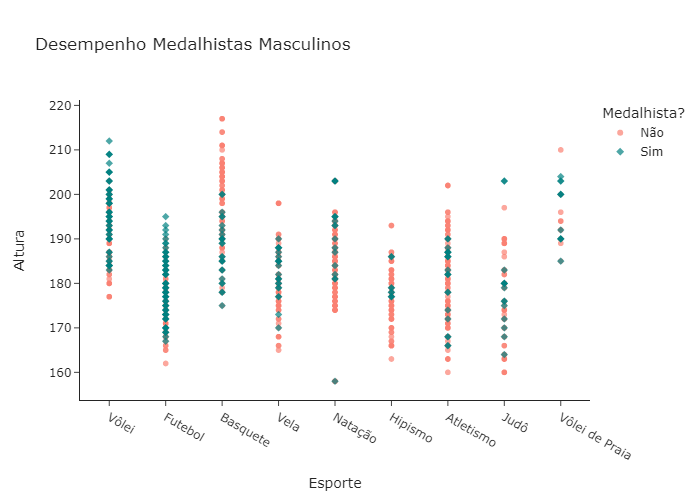

In [17]:
# Criando o gráfico scatter de alturas x medalhas do gênero masculino
fig = px.scatter(data_frame=df_aux_M, x="Sport", y="Height", color="Medalhista?", symbol="Medalhista?", hover_name="Name",
                 title="Desempenho Medalhistas Masculinos",  
                 template="simple_white", color_discrete_map={"Sim": "teal", "Não": "salmon"},
                 opacity=.7)

fig.update_layout(yaxis_title="Altura", xaxis_title="Esporte")

fig.show("png")

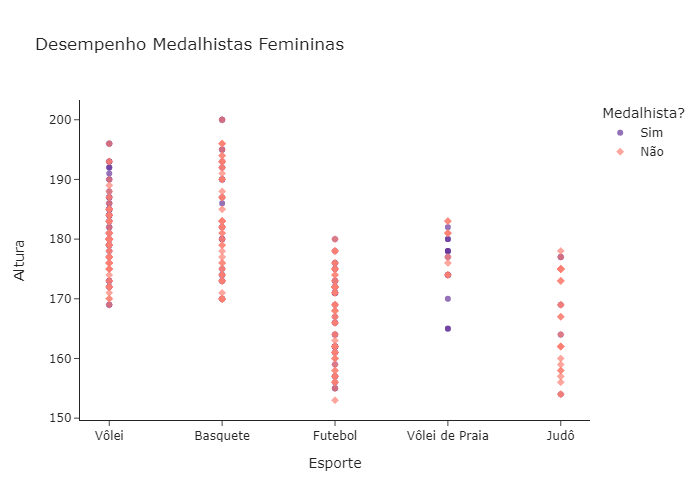

In [18]:
# Criando o gráfico scatter de alturas x medalhas do gênero feminino
fig = px.scatter(data_frame=df_aux_F, x="Sport", y="Height", color="Medalhista?", symbol="Medalhista?", hover_name="Name",
                 title="Desempenho Medalhistas Femininas",  
                 template="simple_white", color_discrete_map={"Sim": "rebeccapurple", "Não": "salmon"},
                 opacity=.7)

fig.update_layout(yaxis_title="Altura", xaxis_title="Esporte")

fig.show("png")

 - Observação: A quantidade de atletas que não ganharam medalhas pode mascarar a análise. Por este motivo, identificamos que somente pela análise do scatter plot não teríamos uma boa visualização para justificar nossa conclusão.

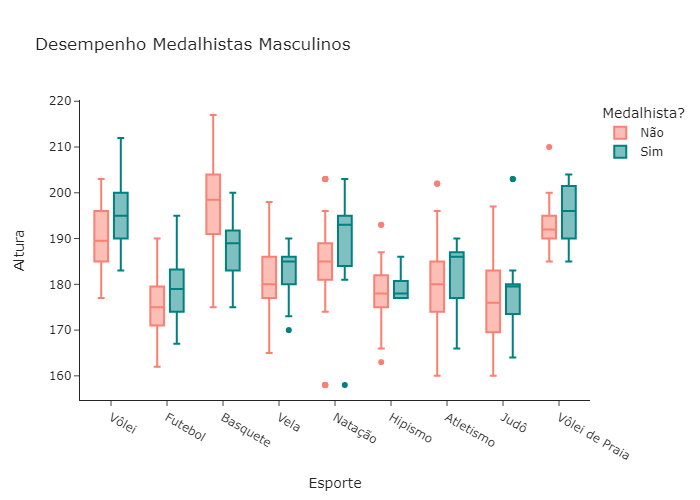

In [19]:
# Criando a visualização dos medalhista masculinos na forma de Boxplot
fig = px.box(df_aux_M, x="Sport", y="Height", color="Medalhista?", title="Desempenho Medalhistas Masculinos",  
             template="simple_white", color_discrete_map={"Sim": "teal", "Não": "salmon"})


fig.update_layout(yaxis_title="Altura", xaxis_title="Esporte")

fig.show("png")

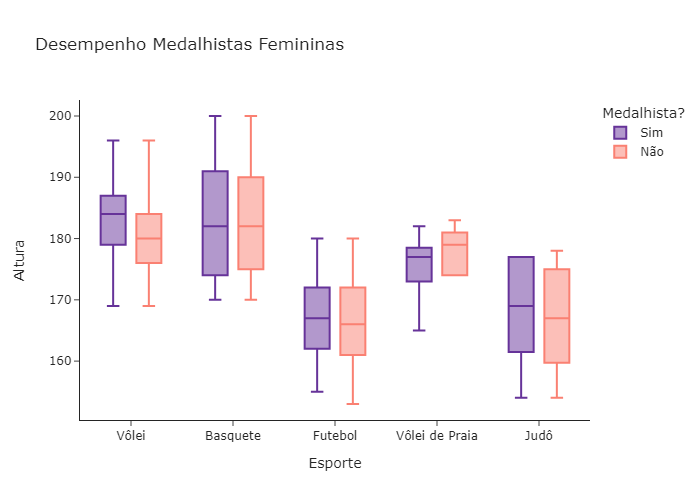

In [20]:
# Criando a visualização das medalhista femininas na forma de Boxplot
fig = px.box(df_aux_F, x="Sport", y="Height", color="Medalhista?", title="Desempenho Medalhistas Femininas",  
             template="simple_white", color_discrete_map={"Sim": "rebeccapurple", "Não": "salmon"})


fig.update_layout(yaxis_title="Altura", xaxis_title="Esporte")

fig.show("png")

### Conclusão da análise:

Somente a altura não aparenta ser um fator determinante para que o atleta conquiste qualquer medalha.

Há muitos outros fatores que envolvem o esporte que cada atleta pratica, especialmente porque cada modalidade possui características físicas muito específicas e outras variáveis, como por exemplo o peso e experiência do atleta, devem ser levadas em consideração já que podem exercer maior influência para determinar o sucesso na competição.

Ao analisarmos os dados podemos observar que as alturas estão bem distribuídas entre os atletas que conquistaram medalhas e os que não conquistaram nenhuma.

Historicamente, os atletas brasileiros têm um desempenho inferior se comparado às grandes potencias mundiais, muito em função da falta de investimento em esportes por parte do país, e também por outros fatores socioeconômicos ao longo dos anos.

Como a análise foi realizada observando somente os atletas brasileiros não foi possível determinar com assertividade o quanto a altura pode realmente ser um fator determinante.
A base de dados para o Brasil é insuficiente justamente por ter uma quantidade menor de medalhas quando se compara os dados com os demais países.

-------------------------------------------------
-------------------------------------------------

**3. Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.**

Crie uma visualização de sua preferência para mostrar, por esporte, a proporção de medalhas de ouro, prata e bronze que nosso país já consquistou.

**Facilitador:** Se preferir, mostre as proporções apenas para os 6 esportes que tiveram mais medalhas.  

*DICA:* Cuidado! Esportes em equipe dão medalhas a todos os jogadores, mas só contabilizam uma vez!

In [21]:
# Criando uma cópia do DataFrame "df_brasil"
df_analise_3 = df_brasil.copy()

# Eliminando os valores nulos da coluna "Medal"
df_analise_3.dropna(subset=["Medal"], inplace=True)
df_analise_3.shape

(475, 15)

In [22]:
# Verificando a quantidade de medalhas GERAIS por esporte
df_analise_3[df_analise_3["Medal"].isin(["Gold", "Silver", "Bronze"])]["Sport"].value_counts()

Football             136
Volleyball           120
Basketball            58
Sailing               34
Beach Volleyball      26
Athletics             26
Judo                  22
Swimming              20
Equestrianism          9
Shooting               8
Boxing                 5
Gymnastics             4
Canoeing               4
Taekwondo              2
Modern Pentathlon      1
Name: Sport, dtype: int64

In [23]:
# Removendo os atletas que ganharam medalhas em um esporte coletivo e contabilizando apenas uma medalha por edição
df_analise_3.drop_duplicates(subset=["Games", "Event", "Medal"], inplace=True)
df_analise_3["Sport"].value_counts()

Judo                 22
Sailing              18
Athletics            16
Swimming             14
Beach Volleyball     13
Volleyball           10
Football              8
Basketball            5
Boxing                5
Shooting              4
Gymnastics            4
Equestrianism         3
Canoeing              3
Taekwondo             2
Modern Pentathlon     1
Name: Sport, dtype: int64

In [24]:
# Escolhendo os 8 esportes que mais proporcionaram medalhas
df_aux_3 = df_analise_3[df_analise_3["Sport"].isin(["Judo", "Sailing", "Athletics", "Swimming", "Volleyball", 
                                                    "Beach Volleyball", "Football", "Boxing"])]

# Agrupando os dados por esporte e por tipo de medalha ganha, fazendo uma contagem através da coluna "Name"
df_aux_3 = df_aux_3.groupby(["Sport", "Medal"], as_index=False)["Name"].count()

# Renomeando a coluna "Name" para "Count"
df_aux_3.rename(columns={"Name": "Count"}, inplace=True)

# Traduzindo os valores das colunas
df_aux_3["Sport"] = df_aux_3["Sport"].map({"Athletics": "Atletismo", "Judo": "Judô", "Sailing": "Vela", 
                                           "Swimming": "Natação", "Volleyball": "Vôlei",
                                           "Beach Volleyball": "Vôlei de Praia", "Football": "Futebol", 
                                           "Boxing": "Boxe"})

# Traduzindo o nome das medalhas
df_aux_3["Medal"] = df_aux_3["Medal"].map({"Gold": "Ouro", "Silver": "Prata", "Bronze": "Bronze"})
                                          
df_aux_3

,Sport,Medal,Count
0,Atletismo,Bronze,8
1,Atletismo,Ouro,5
2,Atletismo,Prata,3
3,Vôlei de Praia,Bronze,3
4,Vôlei de Praia,Ouro,3
5,Vôlei de Praia,Prata,7
6,Boxe,Bronze,3
7,Boxe,Ouro,1
8,Boxe,Prata,1
9,Futebol,Bronze,2


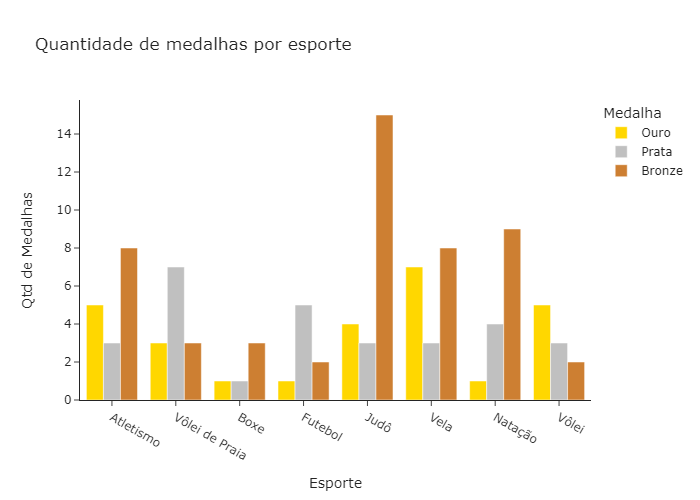

In [25]:
# Criando o gráfico
fig = px.bar(data_frame=df_aux_3, x="Sport", y="Count", color="Medal", barmode="group",
            color_discrete_map={"Ouro": "gold", "Prata": "silver", "Bronze": "#cd7f32"},
            category_orders={"Medal": ["Ouro", "Prata", "Bronze"]}, template="simple_white",
            labels={"Medal": "Medalha"}, title="Quantidade de medalhas por esporte")

fig.update_layout(yaxis_title="Qtd de Medalhas", xaxis_title="Esporte")

fig.show("png")

 - Abaixo a visulização dos dados na forma de gráficos de pizza, separadas por esportes, para vermos a proporção percentual de cada tipo de medalha por esporte.

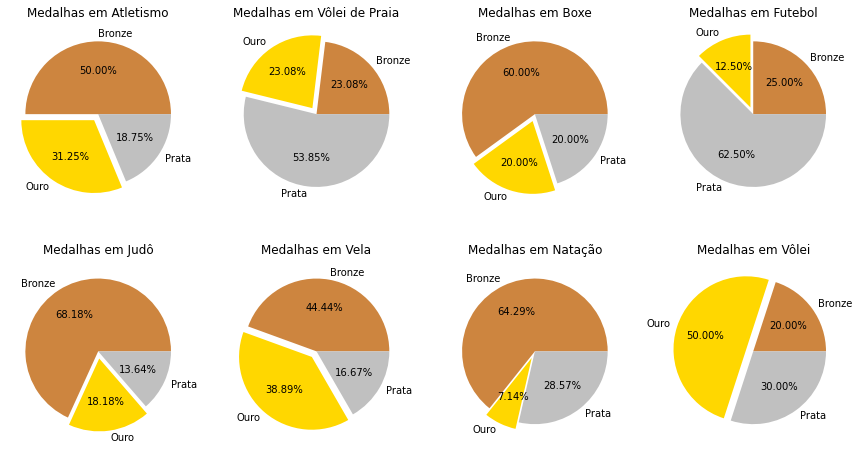

In [26]:
# Criando a visualização em gráficos de Pizza

fig, ax = plt.subplots(nrows=2,ncols=4, figsize=(15,8))
for i, esporte in enumerate(df_aux_3["Sport"].unique()):
    df_aux = df_aux_3[df_aux_3["Sport"]==esporte].copy()
    if i in [0, 1, 2, 3]:
        ax[0, i].pie(x="Count", data=df_aux, labels="Medal",  
                     colors=df_aux_3["Medal"].map({"Ouro" : "gold", "Prata" : "silver", "Bronze": "peru"}), 
                     autopct="%.2f%%", explode=(0, 0.1, 0))
        ax[0, i].set_title("Medalhas em "+ esporte)
    else:
        ax[1, i-4].pie(x="Count", data=df_aux, labels="Medal", 
                       colors=df_aux_3["Medal"].map({"Ouro" : "gold", "Prata" : "silver", "Bronze": "peru"}), 
                     autopct="%.2f%%", explode=(0, 0.1, 0))
        ax[1, i-4].set_title("Medalhas em "+ esporte)
        
plt.show()

-------------------------------------------------
-------------------------------------------------

**4. Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras.**

Crie um gráfico de sua escolha, que mostre o total de medalhas de ouro, prata e bronze, por edição da olimpíada (em ordem cronológica). 

*DICA:* Mais uma vez, tome cuidado com os esportes em grupo - os contabilize apenas uma vez!

In [27]:
# Criando uma cópia do DataFrame "df_brasil"
df_analise_4 = df_brasil.copy()

# Eliminando os valores nulos da coluna "Medal"
df_analise_4.dropna(subset=["Medal"], inplace=True)
df_analise_4.shape

(475, 15)

In [28]:
# Removendo os atletas que ganharam medalhas em um esporte coletivo e contabilizando apenas uma medalha por edição
df_analise_4.drop_duplicates(subset=["Games", "Event", "Medal"], inplace=True)

In [29]:
# Agrupando os dados por esporte e por tipo de medalha ganha, fazendo uma contagem através da coluna "Name"
df_aux_4 = df_analise_4.groupby(["Year", "Medal"], as_index=False)["Name"].count()

# Renomeando a coluna "Name" para "Count"
df_aux_4.rename(columns={"Name": "Count"}, inplace=True)

# Traduzindo os valores das colunas
df_aux_4["Medal"] = df_aux_4["Medal"].map({"Gold": "Ouro", "Silver": "Prata", "Bronze": "Bronze"})
                                  
df_aux_4

,Year,Medal,Count
0,1920,Bronze,1
1,1920,Ouro,1
2,1920,Prata,1
3,1948,Bronze,1
4,1952,Bronze,2
5,1952,Ouro,1
6,1956,Ouro,1
7,1960,Bronze,2
8,1964,Bronze,1
9,1968,Bronze,2


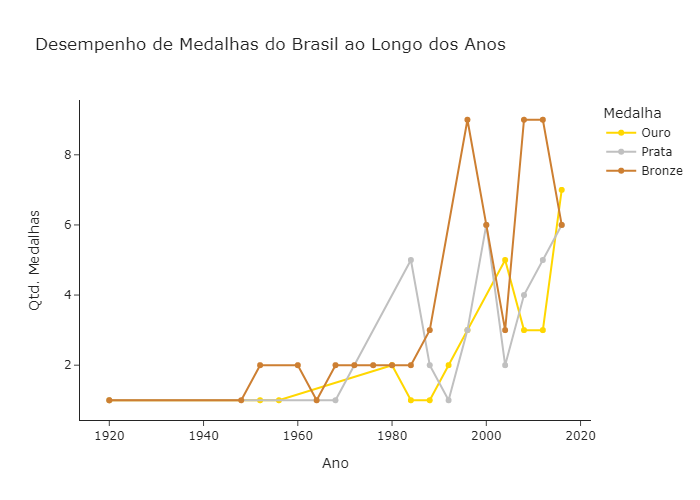

In [30]:
# Criando o gráfico de linhas
fig = px.line(data_frame=df_aux_4, x="Year", y="Count", color="Medal", 
              title="Desempenho de Medalhas do Brasil ao Longo dos Anos", template="simple_white",
              color_discrete_map={"Ouro": "gold", "Prata": "silver", "Bronze": "#cd7f32"},
              category_orders={"Medal": ["Ouro", "Prata", "Bronze"]}, markers=True,
              labels={"Year": "Ano", "Medal": "Medalha", "Count": "Qtd. Medalhas"})

fig.show("png")

--------------------
---------------------

**5. Agora é com vocês!** 

Escolha uma análise visual que julga interessante de fazer neste conjunto de dados, faça o(s) gráficos(s) necessários e comente os resultados. 

 - Ao longo desta análise vamos precisar de uma função para facilitar a inserção de linhas no meio de um Dataframe, por isso, declaramos esta função logo abaixo:
 
  OBS: A função foi retirada do link: [Inserir linha em posição no Dataframe Pandas](https://acervolima.com/insira-a-linha-em-determinada-posicao-no-dataframe-do-pandas/)

In [31]:
# Função para inserir linhas em um Dataframe

def inserir_linha(numero_linha: int, df, valor_linha: list):
    # Fatia a metade superior do dataframe
    df1 = df[0:numero_linha]
   
    # Armazena o resultado da metade inferior do dataframe
    df2 = df[numero_linha:]
   
    # Insere a linha na metade superior do dataframe
    df1.loc[numero_linha]=valor_linha
   
    # Concatenar os dois dataframes
    df_resultado = pd.concat([df1, df2])
   
    # Reatribuindo os títulos do índice
    df_resultado.index = [*range(df_resultado.shape[0])]
   
    # Retornando o dataframe atualizado
    return df_resultado

In [32]:
# Verificando o país que obteve o maior número de medalhas nos Jogos Olímpicos de Verão
df.groupby(["NOC", "Season"], as_index=False)[["Medal"]].value_counts().sort_values("count", ascending=False)

,NOC,Season,Medal,count
451,USA,Summer,Gold,2472
452,USA,Summer,Silver,1333
453,USA,Summer,Bronze,1197
442,URS,Summer,Gold,832
160,GBR,Summer,Silver,729
...,...,...,...,...
1,AHO,Summer,Silver,1
409,TGA,Summer,Silver,1
245,KAZ,Winter,Gold,1
250,KGZ,Summer,Silver,1


 - Com base nos dados acima, é possível verificar que historicamente os Estados Unidos possuem a maior quantidade de medalhas ganhas ao longo dos Jogos Olímpicos de Verão. 
 
 - Por este motivo faremos uma análise em cima dos dados referentes ao gênero de participantes deste país, e também de seus desempenhos na conquista de medalhas.

Após a definição do [COI para o programa de Paris 2024 em que será a primeira edição com igualdade de gêneros](https://ge.globo.com/olimpiadas/noticia/coi-define-programa-de-paris-2024-com-igualdade-de-generos-em-participacao-e-confirma-breakdance.ghtml) em participação, decidimos fazer uma análise da participação feminina ao longo das olimpíadas.

Como estamos analisando também somente o país Estados Unidos, também faremos uma análise específica sobre a participação feminina no país em questão mais abaixo. 


### Um pouco de contexto histórico para evidenciar a importância dessa decisão do COI.

Os jogos da chamada Era Moderna, tiveram sua primeira organização em 1896, pelo barão Piérre de Fredy, que defendia a ideia de seguir com as mesmas tradições já estabelecidas pelos jogos da antiguidade, sendo a única diferença de que as mulheres pudessem assistir aos jogos nas arquibancadas, mas não poderiam competir nas Olimpíadas.

Em resposta às proibições, Stamata Revithi, correu a maratona de 40 km durante dos jogos, do lado de fora do Estádio Panathinaiko, local onde ocorreu a competição oficial, mas ainda que tenha realizado o percurso em um tempo inferior ao dos homens, sua performance não foi reconhecida.

A primeira participação feminina nos Jogos Olímpicos veio muito depois disso, somente em 1900. Contando apenas com 22 atletas mulheres e que podiam participar somente em duas modalidades: o tênis e o golfe, por não haver contato físico.

Fonte: [História da Participação Feminina nas Olimpíadas](https://falauniversidades.com.br/olimpiadas-qual-foi-a-origem-da-participacao-feminina-nos-jogos/)

#### Agora, vamos seguir para as análises!

### Análise geral da participação feminina nos Jogos Olímpicos de Verão

 - Primeiro, faremos uma análise geral da participação feminina na história das Olímpiadas

In [33]:
# Análise do número total de participantes por edição

# Criando uma cópia do Dataframe original
df_part_geral = df.copy()

# Eliminando as linhas duplicadas de acordo com o nome, esporte e ano de participação
df_part_geral.drop_duplicates(subset=["Name", "Sport", "Year"], inplace=True)

# Eliminando os dados referentes aos Jogos Olímpicos Intercalares de 1906
jogos_1906 = df_part_geral[df_part_geral["Year"]== 1906].index
df_part_geral.drop(jogos_1906, inplace=True)

# Agrupando os dados dos Jogos de Verão por ano e fazendo uma contagem de variáveis por linha
df_part_geral = df_part_geral[(df_part_geral["Season"] == "Summer")].groupby(["Year"], as_index=False).count()

# Dataframe com a contagem do número total de atletas por edição dos Jogos Olímpicos de Verão
df_part_geral

,Year,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
0,1896,201,201,201,93,21,21,201,201,201,201,201,201,201,71
1,1900,1260,1260,1260,667,54,41,1260,1260,1260,1260,1260,1260,1260,369
2,1904,681,681,681,525,93,80,681,681,681,681,681,681,681,281
3,1908,2074,2074,2074,1583,264,308,2074,2074,2074,2074,2074,2074,2074,588
4,1912,2446,2446,2446,2352,371,345,2446,2446,2446,2446,2446,2446,2446,540
5,1920,2716,2716,2716,2153,448,319,2716,2716,2716,2716,2716,2716,2716,840
6,1924,3277,3277,3277,2574,588,492,3277,3277,3277,3277,3277,3277,3277,547
7,1928,3264,3264,3264,2626,604,501,3264,3264,3264,3264,3264,3264,3264,544
8,1932,1929,1929,1929,1687,723,333,1929,1929,1929,1929,1929,1929,1929,485
9,1936,4493,4493,4493,4332,779,702,4493,4493,4493,4493,4493,4493,4493,718


In [34]:
# Análise do número total de participantes do gênero feminino por edição

# Criando uma cópia do Dataframe original
df_part_fem = df.copy()

# Eliminando as linhas duplicadas de acordo com o nome, esporte e ano de participação
df_part_fem.drop_duplicates(subset=["Name", "Sport", "Year"], inplace=True)

# Eliminando os dados referentes aos Jogos Olímpicos Intercalares de 1906
jogos_1906 = df_part_fem[df_part_fem["Year"]== 1906].index
df_part_fem.drop(jogos_1906, inplace=True)

# Agrupando os dados dos Jogos de Verão por ano e fazendo uma contagem de variáveis por linha
# Filtrando pelo gênero FEMININO
df_part_fem = df_part_fem[(df_part_fem["Season"] == "Summer") &
                         (df_part_fem["Sex"] == "F")].groupby(["Year"], as_index=False).count()

# Inserindo a linha referente ao ano de 1896 (participação feminina foi igual a 0)
df_part_fem = inserir_linha(0, df_part_fem, [1896, 0,0,0,0,0,0,0,0,0,0,0,0,0,0])

# Dataframe com a contagem do número total de atletas mulheres por edição dos Jogos Olímpicos de Verão
df_part_fem

,Year,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
0,1896,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1900,23,23,23,16,0,0,23,23,23,23,23,23,23,7
2,1904,6,6,6,5,0,0,6,6,6,6,6,6,6,3
3,1908,44,44,44,36,0,0,44,44,44,44,44,44,44,14
4,1912,54,54,54,54,0,0,54,54,54,54,54,54,54,11
5,1920,79,79,79,71,15,1,79,79,79,79,79,79,79,22
6,1924,159,159,159,120,21,3,159,159,159,159,159,159,159,28
7,1928,313,313,313,260,53,40,313,313,313,313,313,313,313,70
8,1932,201,201,201,180,65,36,201,201,201,201,201,201,201,37
9,1936,362,362,362,348,76,63,362,362,362,362,362,362,362,66


#### Para dados de contagem, utilizaremos a coluna "Name" como referência para o número de atletas por edição

In [35]:
# Fórmula para descobrir o percentual da participação feminina nos Jogos Olímpicos de Verão
percent_mulheres = round((df_part_fem["Name"] / df_part_geral["Name"]) * 100, 2)

In [36]:
# Inserindo uma nova coluna no df_part_geral que informa o % de mulheres participantes por edição
df_part_geral.insert(loc=15, column="% de Mulheres", value=percent_mulheres)

df_part_geral

,Year,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,% de Mulheres
0,1896,201,201,201,93,21,21,201,201,201,201,201,201,201,71,0.00
1,1900,1260,1260,1260,667,54,41,1260,1260,1260,1260,1260,1260,1260,369,1.83
2,1904,681,681,681,525,93,80,681,681,681,681,681,681,681,281,0.88
3,1908,2074,2074,2074,1583,264,308,2074,2074,2074,2074,2074,2074,2074,588,2.12
4,1912,2446,2446,2446,2352,371,345,2446,2446,2446,2446,2446,2446,2446,540,2.21
5,1920,2716,2716,2716,2153,448,319,2716,2716,2716,2716,2716,2716,2716,840,2.91
6,1924,3277,3277,3277,2574,588,492,3277,3277,3277,3277,3277,3277,3277,547,4.85
7,1928,3264,3264,3264,2626,604,501,3264,3264,3264,3264,3264,3264,3264,544,9.59
8,1932,1929,1929,1929,1687,723,333,1929,1929,1929,1929,1929,1929,1929,485,10.42
9,1936,4493,4493,4493,4332,779,702,4493,4493,4493,4493,4493,4493,4493,718,8.06


### Análise da participação feminina nos Jogos Olímpicos de Verão do país Estados Unidos

 - Agora, faremos a análise considerando a participação feminina dos Estados Unidos na história das Olímpiadas

In [37]:
# Análise do número total de participantes americanos por edição

# Criando uma cópia do Dataframe original
df_part_geral_eua = df.copy()

# Eliminando as linhas duplicadas de acordo com o nome, esporte e ano de participação
df_part_geral_eua.drop_duplicates(subset=["Name", "Sport", "Year"], inplace=True)

# Eliminando os dados referentes aos Jogos Olímpicos Intercalares de 1906
jogos_1906 = df_part_geral_eua[df_part_geral_eua["Year"]== 1906].index
df_part_geral_eua.drop(jogos_1906, inplace=True)

# Agrupando os dados dos atletas americanos nos Jogos de Verão por ano e contando as variáveis por linha
df_part_geral_eua = df_part_geral_eua[(df_part_geral_eua["Season"] == "Summer") &
                                     (df_part_geral_eua["NOC"] == "USA")].groupby(["Year"], as_index=False).count()

# Inserindo a linha referente ao ano de 1980 (os EUA se recusaram a participar nas Olimpíadas de Moscou)
df_part_geral_eua = inserir_linha(18, df_part_geral_eua, [1980, 0,0,0,0,0,0,0,0,0,0,0,0,0,0])

# Dataframe com a contagem do número total de atletas americanos por edição dos Jogos Olímpicos de Verão
df_part_geral_eua

,Year,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
0,1896,14,14,14,14,7,6,14,14,14,14,14,14,14,10
1,1900,76,76,76,73,20,15,76,76,76,76,76,76,76,37
2,1904,550,550,550,438,69,57,550,550,550,550,550,550,550,208
3,1908,131,131,131,127,89,85,131,131,131,131,131,131,131,31
4,1912,175,175,175,174,120,108,175,175,175,175,175,175,175,34
5,1920,297,297,297,296,202,116,297,297,297,297,297,297,297,114
6,1924,302,302,302,300,193,99,302,302,302,302,302,302,302,140
7,1928,282,282,282,274,131,118,282,282,282,282,282,282,282,65
8,1932,474,474,474,450,120,108,474,474,474,474,474,474,474,155
9,1936,361,361,361,357,103,108,361,361,361,361,361,361,361,77


In [38]:
# Análise do número total de participantes americanas por edição - Gênero Feminino

# Criando uma cópia do Dataframe original
df_part_fem_eua = df.copy()

# Eliminando as linhas duplicadas de acordo com o nome, esporte e ano de participação
df_part_fem_eua.drop_duplicates(subset=["Name", "Sport", "Year"], inplace=True)

# Eliminando os dados referentes aos Jogos Olímpicos Intercalares de 1906
jogos_1906 = df_part_fem_eua[df_part_fem_eua["Year"]== 1906].index
df_part_fem_eua.drop(jogos_1906, inplace=True)

# Agrupando os dados das atletas americanas nos Jogos de Verão por ano e contando as variáveis por linha
# Filtrando pelo gênero FEMININO
df_part_fem_eua = df_part_fem_eua[(df_part_fem_eua["Season"] == "Summer") &
                                  (df_part_fem_eua["NOC"] == "USA") &
                                  (df_part_fem_eua["Sex"] == "F")].groupby(["Year"], as_index=False).count()

# Inserindo as linhas referentes aos anos de 1896, 1908 e 1912 (participação feminina foi igual a 0)
df_part_fem_eua = inserir_linha(0, df_part_fem_eua, [1896, 0,0,0,0,0,0,0,0,0,0,0,0,0,0])
df_part_fem_eua = inserir_linha(3, df_part_fem_eua, [1908, 0,0,0,0,0,0,0,0,0,0,0,0,0,0])
df_part_fem_eua = inserir_linha(4, df_part_fem_eua, [1912, 0,0,0,0,0,0,0,0,0,0,0,0,0,0])

# Inserindo a linha referente ao ano de 1980 (os EUA se recusaram a participar nas Olimpíadas de Moscou)
df_part_fem_eua = inserir_linha(18, df_part_fem_eua, [1980, 0,0,0,0,0,0,0,0,0,0,0,0,0,0])

# Dataframe com a contagem do número total de atletas americanas por edição dos Jogos Olímpicos de Verão
df_part_fem_eua

,Year,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
0,1896,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1900,7,7,7,7,0,0,7,7,7,7,7,7,7,4
2,1904,6,6,6,5,0,0,6,6,6,6,6,6,6,3
3,1908,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1912,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1920,14,14,14,14,12,0,14,14,14,14,14,14,14,8
6,1924,25,25,25,24,13,2,25,25,25,25,25,25,25,15
7,1928,44,44,44,44,13,10,44,44,44,44,44,44,44,14
8,1932,74,74,74,67,15,15,74,74,74,74,74,74,74,20
9,1936,47,47,47,46,13,12,47,47,47,47,47,47,47,10


#### Para dados de contagem, utilizaremos a coluna "Name" como referência para o número de atletas por edição

In [39]:
# Fórmula para descobrir o percentual da participação feminina nos Jogos Olímpicos de Verão
percent_mulheres_eua = round((df_part_fem_eua["Name"] / df_part_geral_eua["Name"]) * 100, 2)

In [40]:
# Inserindo uma nova coluna no df_part_geral_eua que informa o % de mulheres participantes por edição
df_part_geral_eua.insert(loc=15, column="% de Mulheres", value=percent_mulheres_eua)

# Preenchendo o valor nulo da nova coluna referente ao ano de 1980 com 0.00
df_part_geral_eua.fillna(value=0.00, inplace=True)

df_part_geral_eua

,Year,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,% de Mulheres
0,1896,14,14,14,14,7,6,14,14,14,14,14,14,14,10,0.00
1,1900,76,76,76,73,20,15,76,76,76,76,76,76,76,37,9.21
2,1904,550,550,550,438,69,57,550,550,550,550,550,550,550,208,1.09
3,1908,131,131,131,127,89,85,131,131,131,131,131,131,131,31,0.00
4,1912,175,175,175,174,120,108,175,175,175,175,175,175,175,34,0.00
5,1920,297,297,297,296,202,116,297,297,297,297,297,297,297,114,4.71
6,1924,302,302,302,300,193,99,302,302,302,302,302,302,302,140,8.28
7,1928,282,282,282,274,131,118,282,282,282,282,282,282,282,65,15.60
8,1932,474,474,474,450,120,108,474,474,474,474,474,474,474,155,15.61
9,1936,361,361,361,357,103,108,361,361,361,361,361,361,361,77,13.02


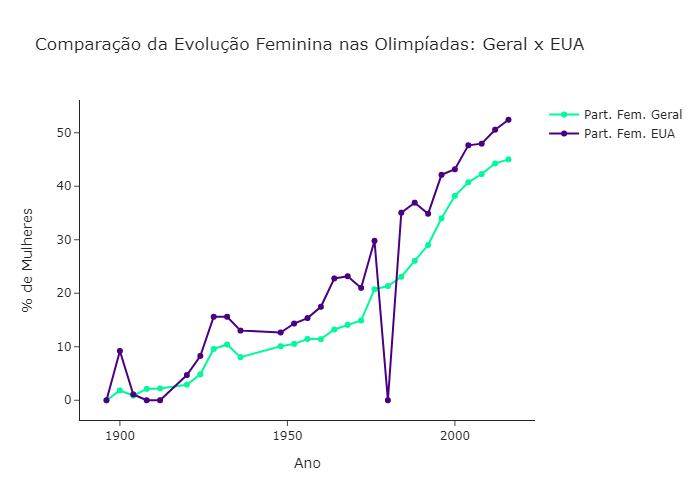

In [41]:
# Criação dos gráficos para comparar a evolução da participação feminina nos Jogos Olímpicos: Geral x EUA
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_part_geral["Year"], y=df_part_geral["% de Mulheres"], 
                         mode='lines+markers', name='Part. Fem. Geral'))
fig.add_trace(go.Scatter(x=df_part_geral_eua["Year"], y=df_part_geral_eua["% de Mulheres"], 
                         mode='lines+markers', name='Part. Fem. EUA'))

fig.update_layout(title_text="Comparação da Evolução Feminina nas Olimpíadas: Geral x EUA", template="simple_white",
                  xaxis_title="Ano", yaxis_title="% de Mulheres", 
                  colorway=["mediumspringgreen", "indigo"],
                  hovermode="x unified")

fig.show("png")

Em 1980, houve um boicote liderado pelos Estados Unidos para protestar a invasão soviética no Afeganistão em 1979. No total, 65 nações se recusaram a participar dos jogos.

Por isso, ao analisarmos a participação feminina geral e compararmos à participação feminina dos Estados Unidos ao longo dos anos, podemos verificar que em 1980 há uma drástica queda em função da não-participação do país nas olimpíadas.

Fonte: [O Boicote Olímpico de 1980](https://2001-2009.state.gov/r/pa/ho/time/qfp/104481.htm)

### Análise da proporção de medalhas ganhas entre homens e mulheres dos Estados Unidos nos Jogos Olímpicos

In [42]:
# Fórmula para descobrir o percentual de medalhas ganhas pelo gênero feminino nos Jogos Olímpicos de Verão pelos EUA
percent_medal_fem = round((df_part_fem_eua["Medal"] / df_part_geral_eua["Medal"]) * 100, 2)

# Fórmula para descobrir o percentual de medalhas ganhas pelo gênero masculino nos Jogos Olímpicos de Verão pelos EUA
percent_medal_masc = round(100 - percent_medal_fem, 2)

In [43]:
# Inserindo uma nova coluna no df_part_geral_eua que informa o % de medalhas ganhas por mulheres americanas
df_part_geral_eua.insert(loc=16, column="% de Medalhas Fem.", value=percent_medal_fem)

# Inserindo uma nova coluna no df_part_geral_eua que informa o % de medalhas ganhas por homens americanos
df_part_geral_eua.insert(loc=17, column="% de Medalhas Masc.", value=percent_medal_masc)

# Eliminando os dados referentes aos Jogos Olímpicos de 1980 (os Estados Unidos não participou)
jogos_1980 = df_part_geral_eua[df_part_geral_eua["Year"]== 1980].index
df_part_geral_eua.drop(jogos_1980, inplace=True)

df_part_geral_eua

,Year,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,% de Mulheres,% de Medalhas Fem.,% de Medalhas Masc.
0,1896,14,14,14,14,7,6,14,14,14,14,14,14,14,10,0.00,0.00,100.00
1,1900,76,76,76,73,20,15,76,76,76,76,76,76,76,37,9.21,10.81,89.19
2,1904,550,550,550,438,69,57,550,550,550,550,550,550,550,208,1.09,1.44,98.56
3,1908,131,131,131,127,89,85,131,131,131,131,131,131,131,31,0.00,0.00,100.00
4,1912,175,175,175,174,120,108,175,175,175,175,175,175,175,34,0.00,0.00,100.00
5,1920,297,297,297,296,202,116,297,297,297,297,297,297,297,114,4.71,7.02,92.98
6,1924,302,302,302,300,193,99,302,302,302,302,302,302,302,140,8.28,10.71,89.29
7,1928,282,282,282,274,131,118,282,282,282,282,282,282,282,65,15.60,21.54,78.46
8,1932,474,474,474,450,120,108,474,474,474,474,474,474,474,155,15.61,12.90,87.10
9,1936,361,361,361,357,103,108,361,361,361,361,361,361,361,77,13.02,12.99,87.01


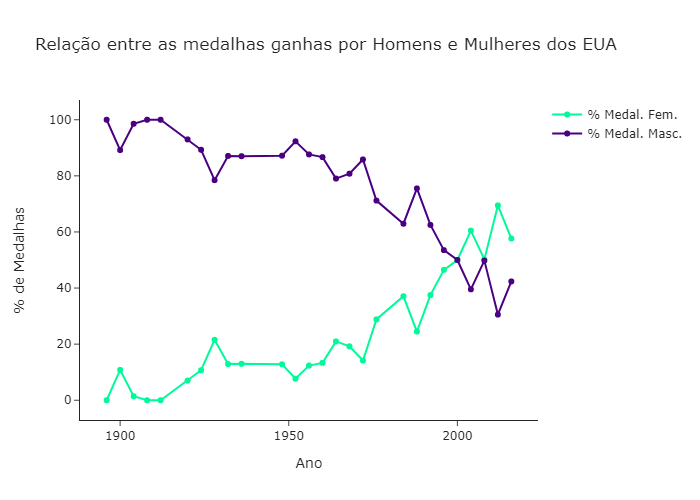

In [46]:
# Criação dos gráficos para comparar a relação entre as medalhas ganhas por homens e mulheres dos Estados Unidos
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_part_geral_eua["Year"], y=df_part_geral_eua["% de Medalhas Fem."], 
                         mode='lines+markers', name='% Medal. Fem.'))
fig.add_trace(go.Scatter(x=df_part_geral_eua["Year"], y=df_part_geral_eua["% de Medalhas Masc."], 
                         mode='lines+markers', name='% Medal. Masc.'))

fig.update_layout(title_text="Relação entre as medalhas ganhas por Homens e Mulheres dos EUA", template="simple_white",
                  xaxis_title="Ano", yaxis_title="% de Medalhas", 
                  colorway=["mediumspringgreen", "indigo"],
                  hovermode="x unified")

fig.show("png")

### Conclusão da análise:

Podemos observar que, enquanto a participação feminina vem crescendo ao longo dos anos, assim como era esperado também ocorre um aumento na porcentagem de medalhas conquistadas.

Outra observação possível é que a participação masculina na contribuição de conquistas de medalhas tem oscilado com o passar dos anos, enquanto que a participação feminina na conquista de medalhas para o país tem mostrado uma tendência de aumento.